In [1]:
from io import BytesIO

import pandas as pd
from PIL import Image

from pytorch_helpers import show_images


In [2]:
listings_df = pd.read_pickle("../data-clean/listings.pkl")
front_page_responses = pd.read_pickle("../data-clean/front_page_responses.pkl")
cnn_pretrained_predictions = pd.read_pickle(
    "../data-clean/cnn_pretrained_predictions.pkl"
)

response_price_df = (
    pd.merge(
        front_page_responses, listings_df["price"], left_index=True, right_index=True
    )
    .assign(
        cnn_pretrained_predictions=cnn_pretrained_predictions.groupby(
            cnn_pretrained_predictions.index
        ).mean()
    )
    .rename(columns={"listing_url": "front_page_responses"})
    .loc[lambda x: (x["price"] > 0) & (x["price"] < 80000)]
    .dropna()
)


In [3]:
def open_image(response):
    try:
        img = Image.open(BytesIO(response.content))
    except:
        img = pd.NA
    return img


response_price_df = response_price_df.assign(
    front_page_pictures=response_price_df["front_page_responses"].apply(open_image)
).dropna()


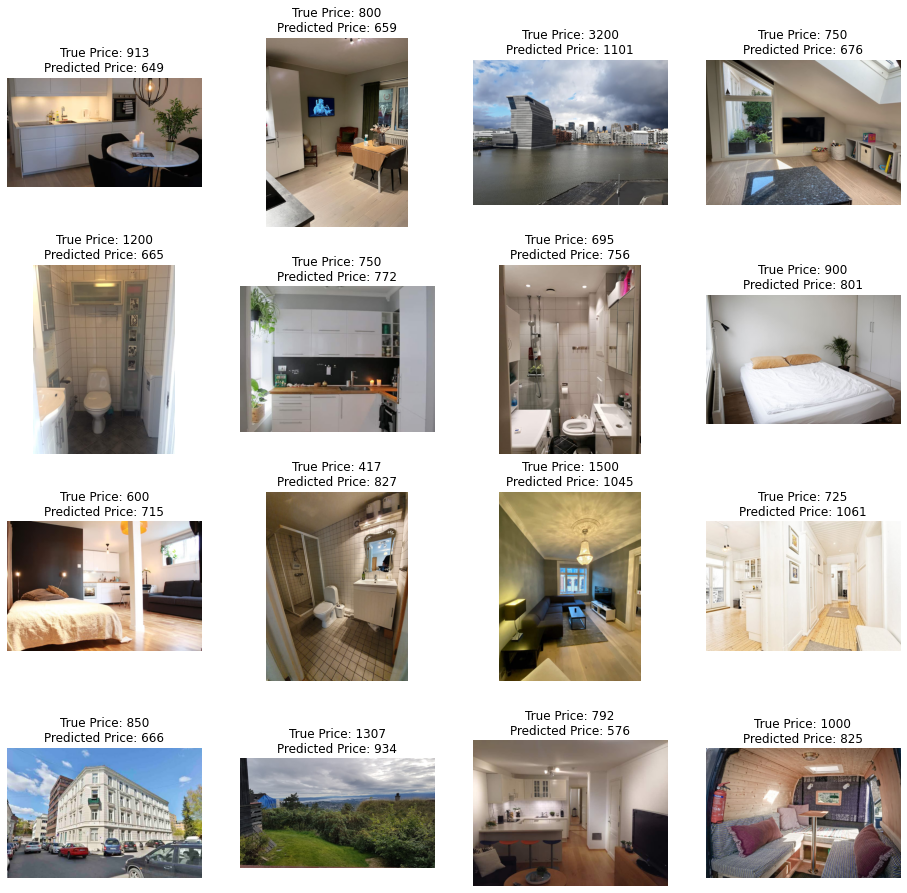

In [4]:
# choose random images from dataset
sample_obs = response_price_df.sample(n=16)

show_images(
    images=sample_obs["front_page_pictures"],
    true_prices=sample_obs["price"],
    predicted_prices=sample_obs["cnn_pretrained_predictions"],
)
